In [42]:
import pandas as pd
import numpy as np
from scipy.stats import norm, chisquare
from scipy.stats import kstest
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load your data into a DataFrame
df = pd.read_csv('../data/Estaciones/Huarpa_mensual.csv')

In [25]:
df.head(5)

,fecha,San.Miguel,Hacienda.Cochas,La.Quinua,Wayllapampa,Huamanga,Allpachaca
0,01-1981,41.76,55.06,79.56,101.94,90.83,44.64
1,02-1981,66.56,78.13,124.63,205.45,185.73,140.60
2,03-1981,54.86,68.75,63.36,78.20,64.65,51.55
3,04-1981,10.66,9.53,13.60,16.83,17.09,11.91
4,05-1981,6.88,4.28,12.74,14.21,6.96,2.54


The data does not follow the fitted distribution (p-value: 1.009817811447687e-13)


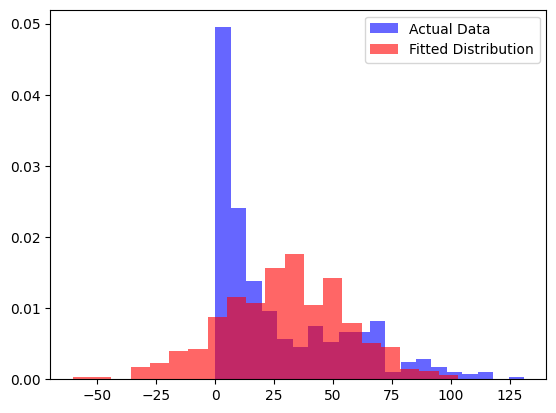

In [26]:
# Assuming your data is in a column called 'data_column'
data = df['Hacienda.Cochas']

# Fit a distribution (e.g., normal distribution) to the data
params = norm.fit(data)

# Extract the parameters of the fitted distribution
loc, scale = params

# Generate random data from the fitted distribution to compare with the original data
fitted_distribution = norm(loc=loc, scale=scale)
fitted_data = fitted_distribution.rvs(size=len(data))

# Plot a histogram of your data and the fitted distribution
plt.hist(data, bins=20, density=True, alpha=0.6, color='b', label='Actual Data')
plt.hist(fitted_data, bins=20, density=True, alpha=0.6, color='r', label='Fitted Distribution')
plt.legend()

# Perform a goodness-of-fit test (Kolmogorov-Smirnov test)
ks_statistic, ks_p_value = kstest(data, fitted_distribution.cdf)
alpha = 0.05  # Significance level

# Print the results of the goodness-of-fit test
if ks_p_value < alpha:
    print(f"The data does not follow the fitted distribution (p-value: {ks_p_value})")
else:
    print(f"The data follows the fitted distribution (p-value: {ks_p_value})")


plt.show()


In [33]:
import numpy as np
from scipy.stats import norm, gamma, lognorm, gumbel_r, loggamma, kstest

def fit_and_test_distributions(data, distribution_names):
    results = {}

    for distribution_name in distribution_names:
        if distribution_name == 'normal':
            params = norm.fit(data)
            fitted_distribution = norm(loc=params[0], scale=params[1])
        elif distribution_name == 'gamma2':
            params = gamma.fit(data, floc=0)
            fitted_distribution = gamma(params[0], loc=0, scale=params[2])
        elif distribution_name == 'gamma3':
            params = gamma.fit(data)
            fitted_distribution = gamma(params[0], loc=params[1], scale=params[2])
        elif distribution_name == 'logpearson':
            params = lognorm.fit(data, floc=0)
            fitted_distribution = lognorm(params[0], loc=0, scale=params[2])
        elif distribution_name == 'gumbel':
            params = gumbel_r.fit(data)
            fitted_distribution = gumbel_r(loc=params[0], scale=params[1])
        elif distribution_name == 'loggumbel':
            params = loggamma.fit(data)
            fitted_distribution = loggamma(params[0], loc=params[1], scale=params[2])
        elif distribution_name == 'lognorm2':
            params = lognorm.fit(data, floc=0, f0=1)
            fitted_distribution = lognorm(params[0], loc=0, scale=params[2])
        elif distribution_name == 'lognorm3':
            params = lognorm.fit(data)
            fitted_distribution = lognorm(params[0], loc=params[1], scale=params[2])

        ks_statistic, ks_p_value = kstest(data, fitted_distribution.cdf)
        results[distribution_name] = {'params': params, 'ks_statistic': ks_statistic, 'ks_p_value': ks_p_value}

    return results


In [35]:
# Example usage:
if __name__ == "__main__":
    import pandas as pd
    import matplotlib.pyplot as plt

    # Load your data into a DataFrame
    df = pd.read_csv('../data/Estaciones/Huarpa_mensual.csv')

    # Assuming your data is in a column called 'data_column'
    data = df['Hacienda.Cochas']

    distribution_names = ['normal', 'gamma2', 'gamma3', 'logpearson', 'gumbel', 'loggumbel','lognorm2','lognorm3']
    results = fit_and_test_distributions(data, distribution_names)

    for distribution_name, result in results.items():
        print(f"--- {distribution_name} ---")
        print("Parameters:", result['params'])
        print("KS Statistic:", result['ks_statistic'])
        print("KS p-value:", result['ks_p_value'])


--- normal ---
Parameters: (27.099629629629632, 28.3310044933738)
KS Statistic: 0.18716519907340445
KS p-value: 1.009817811447687e-13
--- gamma2 ---
Parameters: (0.7756452498856257, 0, 34.93817519494339)
KS Statistic: 0.06974009690580801
KS p-value: 0.02849540730666933
--- gamma3 ---
Parameters: (0.7482944775495306, 0.11999999999999997, 40.94812090507892)
KS Statistic: 0.09155221380436174
KS p-value: 0.0013338017112808653
--- logpearson ---
Parameters: (1.4614254096644248, 0.0, 12.568785316195923)
KS Statistic: 0.0828955942403714
KS p-value: 0.004964777473678307
--- gumbel ---
Parameters: (14.794068327854385, 18.70386794055996)
KS Statistic: 0.15318873302656222
KS p-value: 2.5644533942210735e-09
--- loggumbel ---
Parameters: (1595.791952576983, -8381.2522829751, 1140.1207098851137)
KS Statistic: 0.1853773623144131
KS p-value: 1.813546714675806e-13
--- lognorm2 ---
Parameters: (1.0, 0.0, 12.568785316195923)
KS Statistic: 0.1729570757961031
KS p-value: 9.033083526045474e-12
--- lognorm3 

In [36]:
def select_best_distribution(results):
    best_distribution = None
    best_ks_statistic = float('inf')  # Initialize with a high value
    best_ks_p_value = 0.0  # Initialize with a low value

    for distribution_name, result in results.items():
        ks_statistic = result['ks_statistic']
        ks_p_value = result['ks_p_value']

        if ks_statistic < best_ks_statistic or (ks_statistic == best_ks_statistic and ks_p_value > best_ks_p_value):
            best_distribution = distribution_name
            best_ks_statistic = ks_statistic
            best_ks_p_value = ks_p_value

    return best_distribution, best_ks_statistic, best_ks_p_value


In [37]:
best_distribution, best_ks_statistic, best_ks_p_value = select_best_distribution(results)

In [38]:
print(f"Best-fit distribution: {best_distribution}")
print("KS Statistic:", best_ks_statistic)
print("KS p-value:", best_ks_p_value)

Best-fit distribution: gamma2
KS Statistic: 0.06974009690580801
KS p-value: 0.02849540730666933


In [49]:
def plot_fitted_distributions(data, best_distribution, params, title='Fitted Distribution and Q-Q Plot'):
    # Create a Q-Q plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.title(f'{best_distribution} Q-Q Plot')
    loc = params[0]  # Location parameter
    stats.probplot(data, dist=best_distribution, sparams=params[1:], plot=plt, loc=loc)

    # Create a histogram of the data
    plt.subplot(1, 2, 2)
    plt.title(f'{best_distribution} Fitted Distribution vs. Data')
    plt.hist(data, bins=20, density=True, alpha=0.6, color='b', label='Actual Data')

    # Generate random data from the fitted distribution
    fitted_distribution = stats.rv_continuous(name=best_distribution, shapes=params[1:], a=loc)
    x = np.linspace(data.min(), data.max(), 100)
    plt.plot(x, fitted_distribution.pdf(x), 'r', label=f'Fitted {best_distribution}')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
params = results[best_distribution]['params']

plot_fitted_distributions(data, 'gamma', params)